In [157]:
# import libraries
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

# metricas de evaluacion para clasificacion (matriz de confusion)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score 

# metricas de evaluacion para regresion (r2 NO es bueno para el test-set)
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

np.set_printoptions(precision=2)


In [158]:
# Week 2: Supervised Machine Learning:
# estimar y_hat de predicciones en train-set y test-set


In [159]:
# Week 2: Intro to Supervised Machine Learning:

# Conceptos Generales

# x variables: representacion de variables de la base  
# y observaciones: y observacion a predecir a partir de base de variables x 
# train-set: x variables que fit/train ajustan el modelo, para obtener los parametros/estimadores(beta/w)
# test-set: x variables para realizar las metricas de evaluacion y performance del modelo 

In [160]:
# 2 Tipos de Aprendizaje Supervisado: Clasificación (continuo)  y Regresión (discreto)

# Clasificacion: y observacion es una clase (o varias clases) discretas 
# Clasificación Binaria: 2 tipos de y observaciones (K=0,1) y[0,1]
# Clasificacion Multi clase: y observacion(target) es una lista de clases discretas a clasificar [peras,manzanas,uvas]
# classification Multi-label : y target tiene  multiple target values


# Regresion: y observacion/target es una variable continua 


In [161]:
# Overfitting and Underfitting


# Modelos para Aprendizaje Supervisado ML Models:
# KNN para Clasificación y Regresión 


# Modelos Lineales
# Regresion Ridge: para muchas variables xi con efecto en y_target
# Prevents overfitting

# Regresion Lasso: solo para pocas variables con mediano/alto efecto en y_target

# Regresion Polynomial: transformar 2D puntos a N-Dimension  
# y observacion/target funcion:
# y = w0*x0 + w1*x1 + w2*x2^2 + w3*x0*x1 + w11*x1^2+ b


# Regresion Logistica:  función de activación sigma(sigmoide) no lineal
# comprime la función a [0-1] 
# probabilidad de y observada/target


# Support Vector Machines: aplicar funcion signo +- a y funcion

# Multi-Class Clasificacion: y observada/target es una lista/categoria de valores 
# convertir problema multi-clase en multiples clasificacion binaria 


# Kernalized Support Vector Machines  SVC
# para regresión y clasificación para data compleja de clasificar 
# Kernalized SVM da modelos complejos que van mas allá de las regiones de decision 


# cross-validation: metodo para fit/train ajustar multiples train-setsy test-sets
# estimadores/predictores más estables para prediccion 
# run multiple train/test sets, averaging performance results 

# Decision Trees, Suprvised Learning for Class and Regression
# if-then reglas que converge a y target/observada 


In [162]:
# Relation between model accuracy vs model complexity:
# for train-set, model accuracy increases with model complexity
# for test-set, model accuracy has max local for model complexity, then over fitting

In [163]:
# load fruit's dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

# over write columns for X features data
X_fruits = fruits[['height', 'width', 'mass', 'color_score']]

# Classification:  columns for unique  y target label 
y_fruits = fruits['fruit_label']

# Multi class:  list of multi-class classification y target values
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

# Plot 2 X data features vs y target label
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# train_test_split(X data,y label, random_state=0 (75-25%)) 
# divide dataset in 75% train-set and 25% test-set
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

# create KNN Multi Class classifier, with k=n_neighbors=5 neighbours
knn = KNeighborsClassifier(n_neighbors = 5)

# knn.fit(X_train,y_train) entrenar/train model with train-set to get model parameter
knn.fit(X_train_scaled, y_train)

# knn.score(X_test,y_test) performance/ medir accuracy del modelo
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

# knn.predict([new_object_datafeatures]) predict new object input from its object X data features
example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


C:\Users\Diego\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [164]:
# Week 2: Overfitting and Underfitting: NOT generalize new inputs

# Generalize: model's ability to predict accurately new input
# Overfitting: models too complex for available train-set
# Underfitting: models too simple that don't performe well in train-set

In [165]:
# Overfitting with KNN model
# increasing k=n_neighbours, decreases variance of desiccion boundaries, underfitting 
# decreasing k=n_neighbours, increases variance of dessicion boundaries, overfitting

In [166]:
# Week 2: Methods/Models for Supervised ML Models
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


<IPython.core.display.Javascript object>


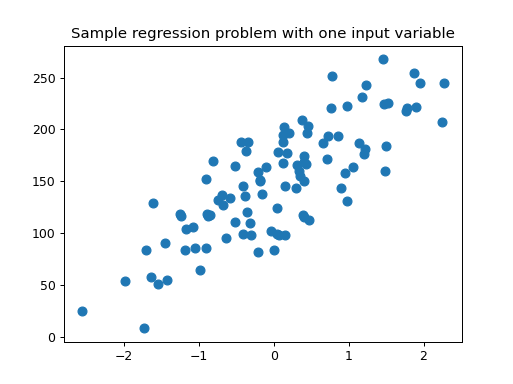

<IPython.core.display.Javascript object>


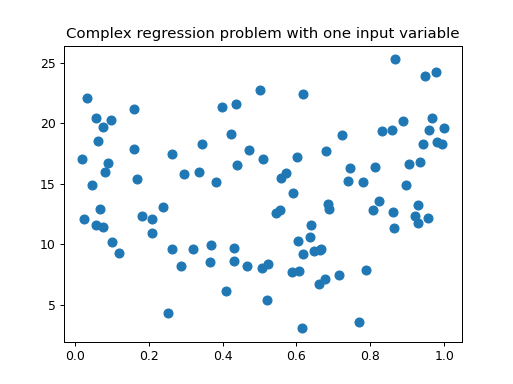

In [167]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')

# Model1: Simple regression with 1 input variable (X data feature)
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')

#  Model 2: Complex regression with 1 input variable (X data feature)
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

<IPython.core.display.Javascript object>


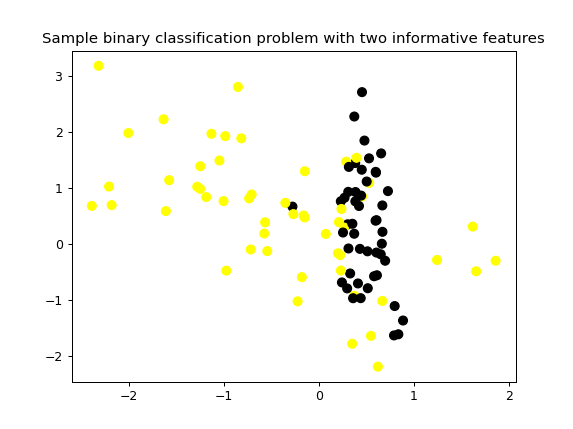

<IPython.core.display.Javascript object>


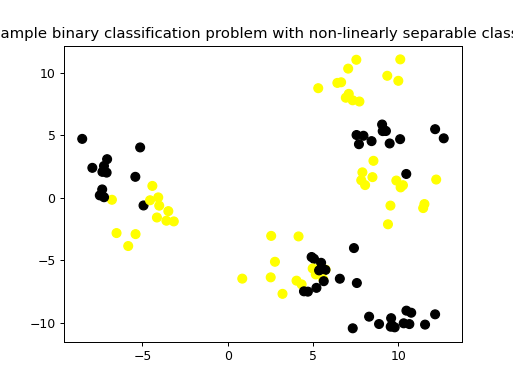

In [168]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')

#  Model 3: Binary Classification with 2 input variables (2 X data features)
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable

#  Model 4: Binary Classification with 2 input variables (2 X data features), linearly dependant
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [169]:
# Week 2: KNN model for Classification and Regression

# plot_two_class_knn(X_train, y_train,k=n_neighbours, 'uniform', X_test, y_test),  plot KNN binary classification
# knn_reg = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train),  create knn regression model fit/train with train-set
# 

In [170]:

# KNN model for Classification and Regression

# Given X_train, y_train (from dataset) and new input x_test 
# 1. Find the k=n_neighbours similar(closer) samples to x_test, in X_train
# 2. Get the labels y target labels for the n_neighbours samples
# 3. Predict the y_test label by majority vote of labels from samples

In [171]:
# KNN Regression Model
# special method for binary classification 
# plot_two_class_knn(X_train, y_train,k=n_neighbours, 'uniform', X_test, y_test)


# knn_reg = KNeighborsRegressor(n_neighbors = k),  create knn regression model
# R-squared test score: [0-1] measures performance of regression models


<IPython.core.display.Javascript object>


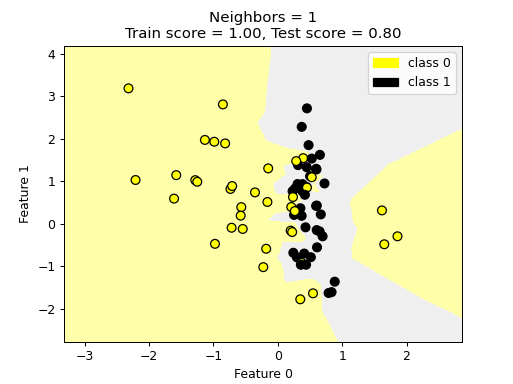

C:\Users\Diego\WORKSPACE\applied_machine_learning_in_python\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<IPython.core.display.Javascript object>


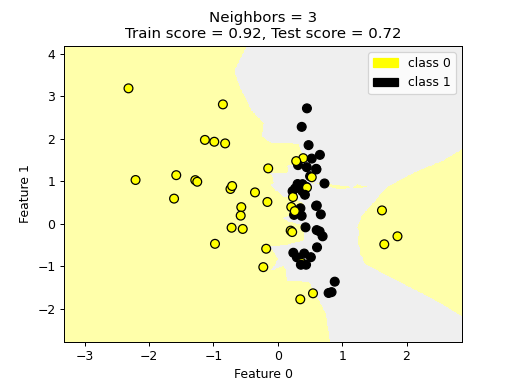

C:\Users\Diego\WORKSPACE\applied_machine_learning_in_python\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<IPython.core.display.Javascript object>


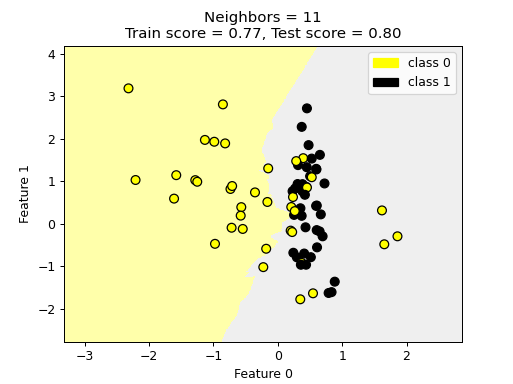

C:\Users\Diego\WORKSPACE\applied_machine_learning_in_python\adspy_shared_utilities.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [172]:
from adspy_shared_utilities import plot_two_class_knn
# Binary Classification (Class 0-1) KNN 

# train_test_split(X_C2, y_C2,random_state=0) train-set, divide subgroups from dataset
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

# special method for binary classification 
# plot_two_class_knn(X_train, y_train,k=n_neighbours, 'uniform', X_test, y_test)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

In [173]:
# KNN Regresor 

from sklearn.neighbors import KNeighborsRegressor

# divide base en train-set y test-set 
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

# knn_reg = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train),  create knn regression model fit/train with train-set
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))


# R-squared test score: [0-1] measures performance of regression models
# R-squared parameter == 0.425, entonces mal performance del modelo

[231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91]
R-squared test score: 0.425


<IPython.core.display.Javascript object>


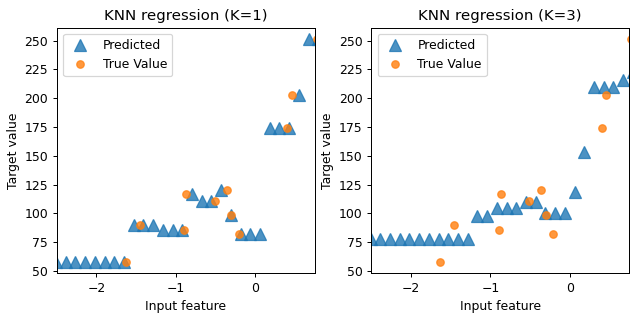

In [174]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

# divide base en train-set y test-set
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)


for thisaxis, K in zip(subaxes, [1, 3]):
    
    # create knn regression model with n_neighbors = K
    # knn.fit(X_train,y_train) entrenar/train knn regression model, get parameters!
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    
    # knn.predict(X_input), predict output for input linspace [-3,3] numb=50
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    
    # plot
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

# smaller values k=n_neighbors get higher complexity models: overfitting 
# larger values k=n_neighbors get simple models: underfitting

<IPython.core.display.Javascript object>


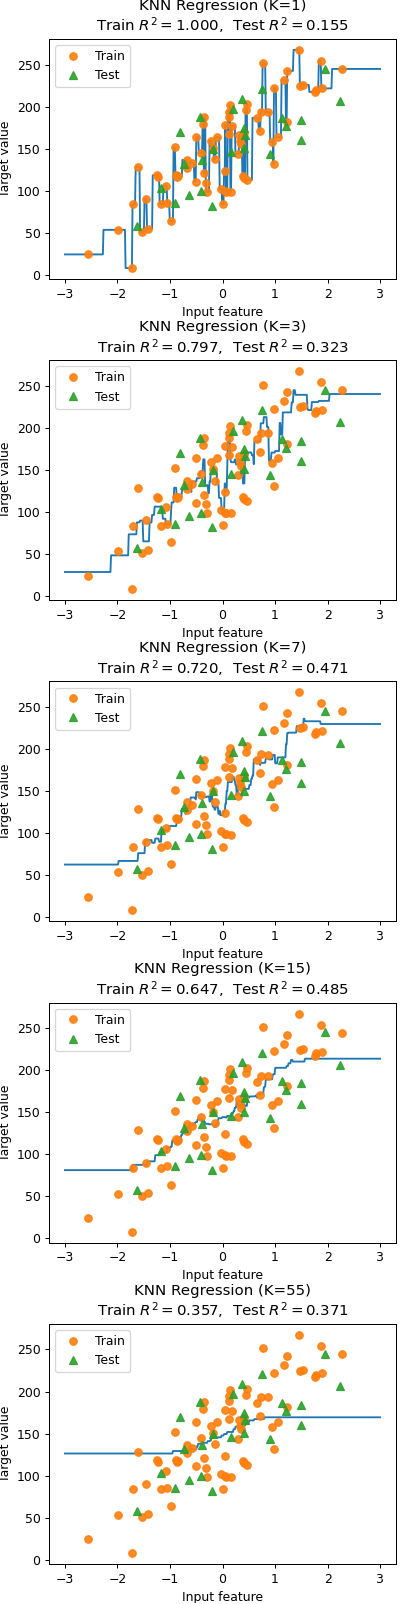

In [175]:
# plot k-NN regression on sample dataset for different values of K

# KNN regression model en función de n_neighbors = K

# create subplots
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))

# create X_data samples (points) for input data to predict
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)

# divide dataset in subgroups
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

# iterate sobre los values de n_neighbors = K
for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    # create KNN regression model, train/entrena model para obtener parametros
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    # predict el y target label for the X_data samples input
    y_predict_output = knnreg.predict(X_predict_input)
    # score measure performance de knn regression model con train-set
    train_score = knnreg.score(X_train, y_train)
    # score measure performace de knn regresion model con test-set
    test_score = knnreg.score(X_test, y_test)
    
    # plot X_data input, y predicted target values
    thisaxis.plot(X_predict_input, y_predict_output)
    # plot train-set
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    # plot test-set
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [176]:
# Week 2:  Modelos Lineales 

# Fuertes supuestos de relacion lineal entre x variables, y observada/target
# obtener funcion y_hat que es combinacion lineal de variables xi, estimadores/predictores  beta/w 

In [177]:
# load datasets

# Breast cancer dataset for classification
#cancer = load_breast_cancer()
#(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
#(X_crime, y_crime) = load_crime_dataset()
#crime = pd.read_csv('CommViolPredUnnormalizedData.txt')

#cols = []

#for column in crime:
#    cols.append(column)
    
#X_crime = crime[cols]
#y_crime = crime['communityname']


In [178]:
# linreg=LinearRegression().fit(X_train, y_train):   crear modelo de Regresión Lineal


In [179]:
# Conceptos de Regresión Lineal:
# y_hat observada/target  es funcion combinancion lineal de xi variables, beta/w estimadores 


# x variables:  x=[x0,x1,x2,..,xn]
# y target/observada:  y = w0x0+w1x2+w2x2+...+wnxn+Cte


# parametros del modelo (estimadas para fit/train): 
# wi: variables  pesos/modelo coefficients
# b: constante  /y-intercepto  (SIEMPRE DEBE ESTAR)

In [180]:
# Least-Squares Linear Regression model:
# Finds w,b tal que min(RSS)= min Sum(y_hat_target-y_actual)^2
# NO hay parameters para controlar la complejidad del modelo

In [196]:
from sklearn.linear_model import LinearRegression

# divide base en train-set y test-set t 
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

# LinearRegression().fit(X_train, y_train),  
# fit/train Linear Regression modelo con train-set 
linreg = LinearRegression().fit(X_train, y_train)

# 
print('linear model coeff (w): {}'
     .format(linreg.coef_))

# calcuar el intercepto de la funcion y_hat print('linear model intercept (b): {:.3f}'
print('linear intercept (w): {}'     
    .format(linreg.intercept_))

# linreg.score(X_train, y_train)):  obtener accuracy del modelo 
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))

# linreg.score(X_train, y_train))  score/measure performance 
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)) ) 

linear model coeff (w): [45.71]
linear intercept (w): 148.44575345658873
R-squared score (training): 0.679
R-squared score (test): 0.492


<IPython.core.display.Javascript object>


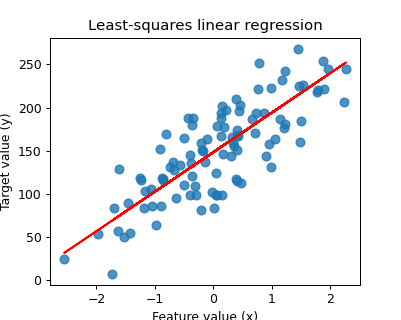

In [197]:
# Plot linear regression model
# Parameters: y target objective function  y(xi) = sum(xi)x+b
# xi: weights of the x vector
# b: y intercept

plt.figure(figsize=(5,4))

# plot x,y train-set data 
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)

# plot y target objective function
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [183]:
#  Week2:Linear Regression Models: 


# Regularización: penalizar los estimadores/predictores beta/w
# linreg = LinearRegression().fit(X_train, y_train) Linear Regression
# linridge = Ridge(alpha=alpha_reg).fit(X_train, y_train) Ridge Regression
  

    
# scaler = MinMaxScaler(), escalador min-max para escalar la base (solo x?) a valores entre [0-1]
# scaler.fit(X_train),  fit/train  ajustar/estandarizar la base a valores [0-1] con escalador  
# clf = Ridge().fit(X_train_scaled, y_train):  crear modelo Ridge con valores normalizados del train-set 


# linlasso = Lasso(alpha=alpha_reg, max_iter = num_inter).fit(X_train_scaled, y_train)
# crear modelo LinearLasso regresión, alpha_reg=2:  fit/train ajustar el modelo con X_train scaled and y_train train-set


# poly = PolynomialFeatures(degree=n_deg)  PolynomialFeatures(degree=n):  crear modelo de Regresión Polinomial
# X_F1_poly = poly.fit_transform(X_F1):   fit/train ajustar el modelo y transformar x_train a espacio N-Dimension 


In [184]:
# Ridge Regression
# L2 penalty = sum(wj)^2
# L2 penalty:  Minimiza la sunma de los estimadores/predictores beta/w multiplicados por alpha_reg SUM(wj)^2 values
# alpha_reg: parametro de regularizacion (control sobre valores grandes de wi )

In [185]:
# Ridge Regression: para muchas variables xi 
# con efecto en y observada/target. Evita overfitting


# igual a Least Square regression, pero con Penalty a wi grandes >>> durante fit/train ajuste
# y obs/target  =  Sum(yi-(wi xi+b))^2 + alpha*Sum(wj)^2 

# Regularization: perviene el overfitting (sobreajuste al train-set, ajusta sobre el error intrinseco)
# y aumenta las metricas de evaluación/performance  del modelo al reducir los parámetros y la complejidad del modelo 


# Ridge Regression prefiere modelo con pequeña Sum de  wi/beta 
# mayor alpha_reg es mayor regularizacion, menor alpha es menor regularización

In [186]:
# divide subgroups: train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
# LinearRegression().fit(X_train, y_train)  fit/train LinearRegression model
# with  train-set data
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')

# get y target objective function  intercept
print('linear model intercept: {}'
     .format(linreg.intercept_))

# get wi weighted values coefficients vector
print('linear model coeff:\n{}'
     .format(linreg.coef_))

# linreg.score(X_train, y_train)) score/measure performance of 
# LinearRegression model on train-set and test-set
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: 148.44575345658873
linear model coeff:
[45.71]
R-squared score (training): 0.679
R-squared score (test): 0.492


In [187]:
# estandarizar variables xi: todos los modelos de ML  todas las variables deben estar
# en la misma escala 

# min-max escalador: transforma todas las variables xi entre [0-1] 
# RobustScaler


# *** fit/ajustar el escalador [0-1] con x_train, NO CON X_test!!! 
# luego transformar el x_test con el scaler() entrenado
# NO!! escalar el train-set y el test-set con diferentes escaladores 

In [188]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

# import min-max scaler to normalize all X data input to [0-1]
scaler = MinMaxScaler()
#  scaler.fit(X_data),  fit/train min-max normalized scaler with X data
scaler.fit(X_train)

# transform X_train data into [0-1] scale
X_train_scaled = scaler.transform(X_train)

# more efficient to fit/train and transform X_data to [0-1] at the same time
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)


# transform X_test data into [0-1] scale
X_test_scaled = scaler.transform(X_test)

# create Ridge regression with normalized train-set
# crear modelo Ridge Reg
#linridge = Ridge(alpha=20.0).fit(X_train, y_train)



linridge_opt = Ridge()


alpha_opt=0
grid_values_alpha = np.linspace(0,2,num=1000) 
mse_train_min = 10000
mse_test_min = 10000

mae_train_min = 1000
mae_test_min = 10000

r2_train_max = 0
r2_test_max=0



for this_alpha in grid_values_alpha:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    
    
    mae_train = mean_absolute_error(X_train_scaled,y_train)
    mae_test = mean_absolute_error(X_test_scaled,y_test)
    
    mse_train = mean_squared_error(X_train_scaled,y_train)
    mse_test = mean_squared_error(X_test_scaled,y_test)
    
    
    r2_train = linridge.score(X_train_scaled,y_train)
    r2_test = linridge.score(X_test_scaled,y_test)
    
    if mse_test < mse_test_min:
        mse_test_min = mse_test
        alpha_opt = this_alpha
    if mae_test < mae_test_min:
        mae_test_min = mae_test
    if  r2_test> r2_test_max:
        r2_test_max = r2_test 

print("El parámetro alpha de regularización óptimo es: "+str(alpha_opt) )
print("El mínimo Error Cuadrático Medio MSE es: "+str(mse_test_min))
print("El mínimo Error Absoluto Medio MAE es: "+str(mae_test_min))
print("El ajuste R2 máximo es:  "+str(r2_test_max))


linridge = Ridge(alpha=alpha_opt).fit(X_train, y_train)


print('Ridge')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))



El parámetro alpha de regularización óptimo es: 0
El mínimo Error Cuadrático Medio MSE es: 10000
El mínimo Error Absoluto Medio MAE es: 154.0382639443784
El ajuste R2 máximo es:  0.5460331196988779
Ridge
ridge regression linear model intercept: 148.44575345658873
ridge regression linear model coeff:
[45.71]
R-squared score (training): 0.679
R-squared score (test): 0.492
Number of non-zero features: 1


In [189]:

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 148.44575345658873
ridge regression linear model coeff:
[45.71]
R-squared score (training): 0.679
R-squared score (test): 0.492
Number of non-zero features: 1


In [190]:
from sklearn.preprocessing import MinMaxScaler

# import min-max scaler to normalize all X data input to [0-1]
scaler = MinMaxScaler()
#  scaler.fit(X_data),  fit/train min-max normalized scaler with X data
scaler.fit(X_train)

# transform X_train data into [0-1] scale
X_train_scaled = scaler.transform(X_train)

# more efficient to fit/train and transform X_data to [0-1] at the same time
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)


# transform X_test data into [0-1] scale
X_test_scaled = scaler.transform(X_test)

# create Ridge regression with normalized train-set
clf = Ridge().fit(X_train_scaled, y_train)

# clf.score(X_test) score/ measure performance of test-set 
r2_score = clf.score(X_test_scaled, y_test)


In [191]:
from sklearn.preprocessing import MinMaxScaler

# create min-max normalizer scaler for train-set data input
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge

# divide train-set and test set from X_data input 
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

# scaler.fit_transform(X_train),  fit/train and transform data into normalized
# [0-1] scale, ALWAYS with train-set
X_train_scaled = scaler.fit_transform(X_train)

# scaler.transform(X_test),  transform test-set data, with fit
# scaler with train-set
X_test_scaled = scaler.transform(X_test)

# create LinearRegression model with alpha_reg=20, fit/train 
# with X_train scaled data and y_train
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

# Plot Linear Ridge model, alpha_reg=20
print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 132.076872087215
ridge regression linear model coeff:
[31.24]
R-squared score (training): 0.179
R-squared score (test): 0.173
Number of non-zero features: 1


In [192]:
# Regularización (control sobre grandes valores de wi)  se vuelve menor 
# importante regularizar bases grandes

In [193]:
print('Ridge regression: effect of alpha regularization parameter\n')

# iterate through different regularization coefficients alpha (validación cruzada)
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    
    
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 1, r-squared training: 0.68, r-squared test: 0.49

Alpha = 1.00
num abs(coeff) > 1.0: 1, r-squared training: 0.64, r-squared test: 0.55

Alpha = 10.00
num abs(coeff) > 1.0: 1, r-squared training: 0.30, r-squared test: 0.29

Alpha = 20.00
num abs(coeff) > 1.0: 1, r-squared training: 0.18, r-squared test: 0.17

Alpha = 50.00
num abs(coeff) > 1.0: 1, r-squared training: 0.08, r-squared test: 0.07

Alpha = 100.00
num abs(coeff) > 1.0: 1, r-squared training: 0.04, r-squared test: 0.03

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.00, r-squared test: -0.01



In [194]:
# Regresión Lasso: para solo POCAS variables xi con medio/largo efecto en y obs/target 


# agrega regularización  alpha_lasso (control sobre largos wi/beta)
# values of wi weights in the y target objective function to shrink wi


# Ridge Regression

# L1 penalty: Minimize sum of  alpha SUM|wj| values.
# L1 = SUM |wi|
# alpha_reg: parametro de regularizacon (control sobre grandes valores de wi )
# some wi are forzed to be zero 0.

In [195]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

# create min/max scaler
scaler = MinMaxScaler()

# divide train-set and test-set from X_data data source
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

# fit/train min/max [0-1] scaler with X_train data
# ALWAYS  fit/transform scaler with X_train train-set data

X_train_scaled = scaler.fit_transform(X_train)

# transform X_test data with trained min/max  scaler
X_test_scaled = scaler.transform(X_test)

# create LinearLasso regression, alpha_reg=2, fit/train model with X_train scaled and y_train train-set
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

# plot 
print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 55.838848668640466
lasso regression linear model coeff:
[175.02]
Non-zero features: 1
R-squared score (training): 0.650
R-squared score (test): 0.545

Features with non-zero weight (sorted by absolute magnitude):


NameError: name 'X_crime' is not defined

In [ ]:
# iterate through different alpha_reg coefficients
# score/measure R-squared performance for different values of regularization
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

In [ ]:
#  Polynomial Linear Regression Models: transform 2D points to N-D 
# y target objective function:
# y = w0*x0 + w1*x1 + w00*x0^2 + w01*x0*x1 + w11*x1^2+ b


# transform (x0,x1) to (x0,x1,x0^2,x0*x1,x1^2)
# much complexity function (carefull to overfit)


# 
# alpha_reg: regularization parameter(control over large values of wi)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# divide train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)

# fit/train LinearRegression model with train-set data
linreg = LinearRegression().fit(X_train, y_train)

# Plot simple Lenar Regression Model
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')


# PolynomialFeatures(degree=n),  create PolynomialFeatures 
poly = PolynomialFeatures(degree=2)

#  poly.fit_transform(X_F1), fit/train and transform X_data to Polynomial LinReg
X_F1_poly = poly.fit_transform(X_F1)

print("Shape of X_F1_poly is:", X_F1_poly.shape[0])
print("Shape of y_F1 is:", y_F1.shape[0])


# divide train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)

# LinearRegression().fit(X_train, y_train),  fit/train LinearRegress model with train-set data source
linreg = LinearRegression().fit(X_train, y_train)



# Plot Polynomial Regress degree=2
print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

# divide train-set and test-set from X_data data source
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

# Plot Polynomial Regress degree=2 + Linear Regression
print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

In [ ]:
# Week2: Logistic Regression

# clf = LogisticRegression(C=100).fit(X_train, y_train)
# plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
#                                        None, 'Logistic regression \
# for binary classification\nFruit dataset: Apple vs others',
#                                        subaxes)

In [ ]:
# Logistic Regression:  logistic non_lin compress [0-1] function
# probability of y  output (binary)


# L2 penalty: Minimize sum of  alpha SUM(wj)^2 values (default)
# C regularization parameter: large C is LESS regularization fits train-set,
# small C is MORE regularization and fits worst the train-set


#  y target objective function:
#  y(f_nonlin)= 1/(1+exp^(-(b+w1*x1...wn*xn)) )
# run result of y through non lineal logistic function f_nonlin
#  f_nonlin=1 if y increases above 0, f_nonlin=0 if y decreases below 0



#  simple form: y target objective function is binary variable(classification)
#  compress the output y to range [0-1] probability of y target to be binary classified in decission region

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

# plot
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))


y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else

# divide train-set and test-set from data source (fruits dataset)
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

# LogisticRegression(C=100).fit(X_train, y_train),  create LogisticRegression 
# fit/train LogisticReg model with train-set data

#  C logistic parameter:  

clf = LogisticRegression(C=100).fit(X_train, y_train)

# plot classifier with train-set data
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

# predict fruit wih x_input data
h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))


# predict fruit wih x_input data
h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

# divide source data X_data into train-set and tests-set
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

# LogisticRegression().fit(X_train, y_train),  fit/train LogisticReg model  
# with train-set 
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

# clf.score(X_train, y_train)),  score/measure performance with train-set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

# clf.score(X_test, y_test)),  score/measure performance with test-set
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

In [ ]:
from sklearn.linear_model import LogisticRegression

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# LogisticRegression().fit(X_train, y_train), create LogisticReg
# fit/train model with train-set
clf = LogisticRegression().fit(X_train, y_train)

# score/measure performance
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
# Week2: Linear Classifier-Support Vector Machines

# clf = SVC(kernel = 'linear', C=c_reg).fit(X_train, y_train)
# create Support Vector Machine, regularization parameter c reg, fit/train with train-set
# plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)
# LinearSVC(C=c_reg).fit(X_train, y_train),  create  LinearSVC

In [ ]:
# Support Vector Machines: aplicar funcion signo +- a y_target function

# apply sign(y)  to get binary values,
# sign(y)>0  y=1, sin(y)<0  y=-1
# y_target objective function  y(xi,wi,b) = sign( (wi.xi)+b )
# y = sign(SUM (wi*xi) +b )

# classifier margin: maximum width the decission boundary area can be
# increased before hitting a data point from X_data train-set
# reward classifier for the separation between binary y output classes

# C regularization: larger values less regularization, fit train-set as well possible classified
# small values has more regularization, large desicion boundary, tolerant to errors

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

# divide train-set and test-set from data source
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

# C regularization parameter 
this_C = 1.0

# clf = SVC(kernel = 'linear', C=c_reg).fit(X_train, y_train)
# create Support Vector Machine, regularization parameter c reg, fit/train with train-set

clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)

# Plot Class regions for Classifier
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

In [ ]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

# divide data source into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    
    # LinearSVC(C=c_reg).fit(X_train, y_train),  create  LinearSVC
    # with parameter c_reg, fit/train model with train-set
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

In [ ]:
from sklearn.svm import LinearSVC

# divide data source into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# LinearSVC().fit(X_train, y_train) create LinearSVC, fit/ttrain model with train-set
clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
# Week 2: Multi-Class Classification

# clf = LinearSVC(C=c_param , random_state = 67 (0 default)).fit(X_train, y_train)
# create LinearSVC parameter C=c_reg, random_state=67, fit/train with train-set


In [ ]:
# Multi-Class Classification: y target value is list/category of values
# convert multi-class problem into multi-binary classification problems

In [ ]:
from sklearn.svm import LinearSVC

# divide X_data souce data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

# create LinearSVC parameter C=5, random_state=67, fit/train with train-set
clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)


# convert multi-class problemm into multiple  binary classification
# each label in category vs all other categories

In [ ]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

In [ ]:
# Week2: Kernalized Support Vector Machines

#plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')
        
# clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train), create kernalized  SVC, RBF function
# clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
# plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)

In [ ]:
# convert/transform xi vector to higher level n degree space
# to make easy separation between decision boundaries


# transform input data to new feature space where LinearClass is easy


# ALWAYS normalize input data  X_data, normalized input data 
# produces more accurate performance of Kernel model

In [ ]:
# Kernalized Support Vector Machines  SVC


# used for classification and regression, for data difficult to classify
# Kernalized SLV provide complex models that go beyond decision boundaries
#  convert/transform input X_data 1D to N-D high dimenssion space by mapping
#  X_data=xi,X_trans=(xi,xi^2)


# Radial Basis Kernelized Function 
# radial basis function (RBF): similarity between transformed and initial points
# k(x,x') = e^(-gamma*|x-x'|^2), 
# param_gamma: influnce of a single-train sample, how tight the desicion boundaries
# small gamma larger similarity radius, more points being grouped, simplifies decision surface
# large gamma kernel value decreases, points must be close, desicion boundaries more complex


# gamma parameter: controls the kernel(function)  width of RBF
# paramters gamma and C are tuned at the same time

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

# divide X_data from data source into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)

plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')


In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier

# divide X_data from data source into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

# iterate through gamma similarity parameter
for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    # create Kernalized SVC, with RBF function, fit/train with train-set
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    # plot
    plt.tight_layout()

In [ ]:
# Kernalized SVC with gamma parameter and C parameter
# ALWAYS normalize input data X_data

from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split

# divide X_data from data source into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

# iterate through gamma parameter
for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    # iterate through C parameter
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        
        # create Kernalized SVC model, with RBF function, gamma and C parameters
        # fit/train model with train-set
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# create min/max scaler

scaler = MinMaxScaler()

# fit/train and transform train-set data 
X_train_scaled = scaler.fit_transform(X_train)

# transform test-set data using trained scaler(with train-set)
X_test_scaled = scaler.transform(X_test)

# create SVC, fit/train model with train-set
clf = SVC(C=10).fit(X_train_scaled, y_train)

# score/measure SVC scaler normalized model
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

In [ ]:
# Week 2: Cross-Validation
# cross_val_score(clf, X, y),  cross-val X_train,y_train data
# train_scores, test_scores = validation_curve(SVC(), X_D2, y_D2,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [ ]:
# cross-validation: method to train and evaluate multiple train-sets and test-sets
# more stable and reliable estimates of classifier performance
# run multiple train/test sets, averaging performance results 
# 

In [ ]:
from sklearn.model_selection import cross_val_score

# create KNN classifier, parameters k=n_neighbors = 5
clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()

# cross_val_score(clf, X, y),  cross-val X,y data
cv_scores = cross_val_score(clf, X, y)

# get 3-fold(3 different train/test sets) score/performance
print('Cross-validation scores (3-fold):', cv_scores)

# get score performance average
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

In [ ]:
# stratified cross-validation: proportion of classes is as close as possible
# regular cross-validation: regression cross-val
# leave one-out cross-validation:cross-val con k=no_sasmples del dataset, for small data

In [ ]:
# evaluate effect of a parameter on cross-val scores
# sensitivity of model to changes of parameters


from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# range of parameter gamma to iterate
param_range = np.logspace(-3, 3, 4)

# get scores/performance of train-set and test-set  scores
train_scores, test_scores = validation_curve(SVC(), X_D2, y_D2,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [ ]:
# Week 2: Decision Trees, Suprvised Learning for Class and Regression
# if-then: rules to converge to target

# DecisionTreeClassifier().fit(X_train, y_train), create DecisionTree, fit/train with train-set
# plot_decision_tree(model, X_data, y_target )

# plot_feature_importances(model, X_data)
# plt.show()

# clf = DecisionTreeClassifier(max_depth = param1, min_samples_leaf = param2,
#                           random_state = 0).fit(X_train, y_train)

In [ ]:
# set of rules tolerant to categorize an object into the correct y target label/category 
# informative split: excellent to separate classes
# starts by finding feature/characteristic with most informative split

# Regression: testing feature value at each node and predicting the target value
# the leaf node prediction is average value of target value for train-set in that node 

# control model complexity: Reduce overfitting of model
# limiting max deep of tree or max leaf/nodes 
# set threshold min instances to consider splitting


# max_depth: most common way to reduce tree complex, controls max number of split point nodes
# min_samples_leaf: threshold for min number of data instances a leaf can have to oversplit
# max_leaf_nodes:  limit of total number of leaves in tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

# load source data
iris = load_iris()

# divide train-set and test-set from source data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)

# DecisionTreeClassifier().fit(X_train, y_train),  create DecisionTree, fit/train with train-set
clf = DecisionTreeClassifier().fit(X_train, y_train)

# score/measure performance of DecisionTree with train-set
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
# Control model complexity

# add max_depth control model complexity
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

In [ ]:
# plot 
plot_decision_tree(clf, iris.feature_names, iris.target_names)

In [ ]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

In [ ]:
# Feature importance calculation: 

# assign 0-1 value to feature/characteristic
# how importance feature X data is for prediction accruracy
# 0: the feature is not used in prediction
# 1: the feature perfectly predicts target
# all feature importances are normalized to sum 1 

In [ ]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)

#  plot_feature_importances(model, df.colums(X_data)), 
#  plot bar chart of feature importance

plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

# divide source data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# create DecisionTree, control model complexity parameters: max_depth=4,min_samples_leaf/node=8
# fit/train model 
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

# plot
plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

In [ ]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()